<a href="https://colab.research.google.com/github/hashmis79/Intro_to_CV/blob/main/cv-basics/Playing_with_matrices/Playing_with_matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Playing With Matrices**

In [ ]:
#Importing Libraries
import numpy as np
import math as m
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# **Numpy**



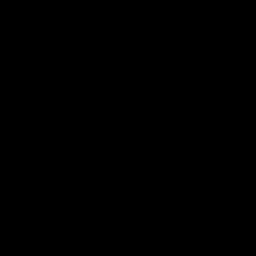

In [ ]:
# Creating a 256x256 array containing Zeros
img=np.zeros((256,256,3),dtype=np.uint8)
cv2_imshow(img)


## **Slicing**
Slicing in python means taking elements from one given index to another given index.

We pass slice instead of index like this: `[start:end]`.

We can also define the step, like this: `[start:end:step]`


In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7])

print(x[1:5])
print(x[:4])
print(x[4:])

## **2D Slicing**
* Now we will be slicing a sub matrix out of a matrix

  We can pass the slice of matrix like this `[start:end, start:end]`


In [ ]:
import numpy as np

x = np.array([[1, 2, 3, 4, 5, 6, 7],[8, 9, 10, 11, 12, 13, 14],[15, 16, 17, 18, 19, 20, 21],[22, 23, 24, 25, 26, 27, 28]])

print("Original Matrix :\n",x)
print("\nPrinting single cell :",x[3,4])
print("\nPrinting single line :",x[2,:])
print("\nPrinting a sub matrix :\n",x[1:3,3:6])
print("\nPrinting a step matrix :\n",x[0:3:2,0:6:2])

Original Matrix :
 [[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]]

Printing single cell : 26

Printing single line : [15 16 17 18 19 20 21]

Printing a sub matrix :
 [[11 12 13]
 [18 19 20]]

Printing a step matrix :
 [[ 1  3  5]
 [15 17 19]]


Image shape:  (304, 244, 3)
Image Dimension:  3
Image datatype:  uint8
copied image shape (304, 244, 3)


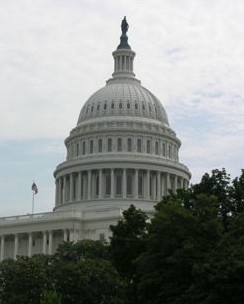

In [59]:
image=cv2.imread('blur.jpeg')
print("Image shape: ",image.shape)
print("Image Dimension: ",image.ndim)
print("Image datatype: ",image.dtype)
# image0=np.zeros_like(image)
image0=np.copy(image)      #copying the image to new array so that I dont hamper the orignal image
print("copied image shape",image0.shape) #showing that even the copyied image has same dimensions
cv2_imshow(image0)

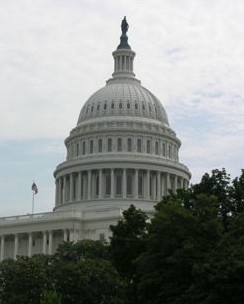

In [60]:
image1=image0[:,:640] ## shows first half of the image ##similarly show height
cv2_imshow(image1)

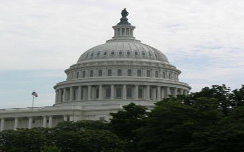

(152, 244, 3)


In [61]:
image2=image0[::2] ## yeh karne se practically image compress ho gaya ## Every alternate rows' pixel is lost ## losing pixels is not a suitable method for compression
cv2_imshow(image2) ## orignal dimension was (720,1280,3)
print(image2.shape)

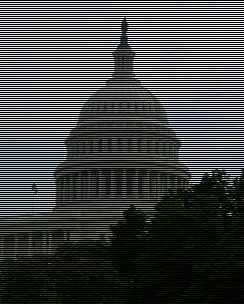

In [62]:
image3=np.copy(image) ## Making alternate rows' pixel to black out
image3[::2,:,:]=0
cv2_imshow(image3)

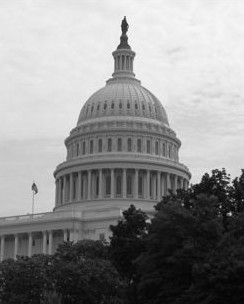

In [63]:
image4=image0[:,:,1] ## accessing channel B since BGR representation 
cv2_imshow(image4)

# **Creating Shapes in Images**
We can make many simple shapes using just manual matrix manipulation. Some examples are :

| | | |
|:----:|:-------:|:----:|
|![](/cv-basics/Playing_with_matrices/images/blur_line.png)|![](/cv-basics/Playing_with_matrices/images/blur__square.png)| ![](/cv-basics/Playing_with_matrices/images/blur_circle.png)|
|**Line**|**Square**|**Circle**|


## **Creating a Line in an image**
### *Now we will write simple code for drawing a horizontal line. We will be using slicing operation in the code.*

Size of image :  304 x 244


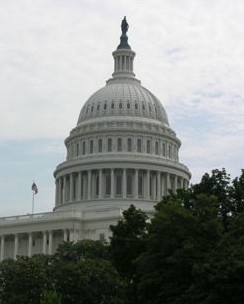

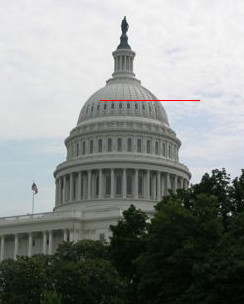

In [64]:
#Defining the Coordinates and length of the Line
i,j,l = 100, 100, 100

# Reading an image
image = cv2.imread('blur.jpeg')     
print("Size of image : ",image.shape[0],"x",image.shape[1])                           

# Creating an array of zeroes
image1 = np.zeros((image.shape[0],image.shape[1],image.shape[2]),dtype = image.dtype) 
image1 = np.copy(image)
# Assigning the Color of the Pixels [B, G, R]
image1[i,j:j+l] = [0,0,255]     
cv2_imshow(image)
cv2_imshow(image1)

*You have Successfully Made a Line*

# **Image Rotation**

## 90 deg
Most basic approach.... to put the pixels at their correct location.
For 90 deg we might simply take a transpose of the matrix.
Remember - we need to keep our BGR of respective pixels together 
Hence we transpose only the first two dimensions which retains the 3 channels for us.


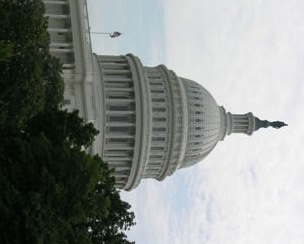

In [65]:

h,w,c=image.shape
image1=np.zeros((w,h,c),dtype=image.dtype)  # creating a new array for image
for i in range(h):
  for j in range(w):
    image1[j][h-1-i]=image[i][j] #clockwise rotation ke liye
    # image1[j][i]=image[i][j] #anti clockwise rotation + flip ke liye
cv2_imshow(image1)
  

## Rotation by 180 deg can be done by applying rotation by 90 twice

> What about other angles? 
> You could apply a bit of what you did learn during your JEE.
Give it a thought!

Where do we need rotation?
* Image rotation is a common image processing routine
* Creating data sets for training machine learning models
* Image Editing and graphic designing


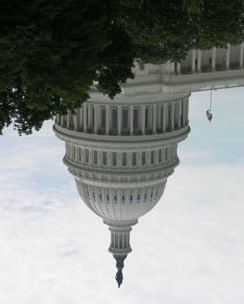

In [66]:
# 180 by applying 90 twice
h,w,c=image1.shape
image2=np.zeros((w,h,c),dtype=image1.dtype)    #creating a new array for image
for i in range(h):
  for j in range(w):
    image2[j][h-1-i]=image1[i][j]
cv2_imshow(image2)

# **Image Translation**
 ## *What does Translation mean?*
   Translation refers to the **rectilinear shift of an object**
  i.e. an image from one location to another. If we know the amount of shift in horizontal and the vertical direction, say (Tx, Ty) then we can make a transformation matrix 
  e.g. \begin{bmatrix} 1 & 0 & Tx \\0 & 1 & Ty \end{bmatrix}
  where Tx denotes the shift along the x-axis and Ty denotes shift along the y-axis i.e. the number of pixels by which we need to shift about in that direction.









  ### **Below is the Python code for Image Translation:**



304 244
76.0 61.0
[[ 1.  0. 61.]
 [ 0.  1. 76.]]


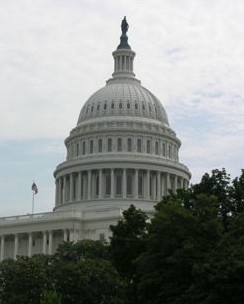

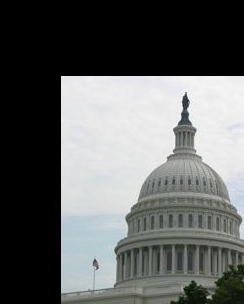

In [67]:
#Translation Matrix elements
#     | 1 0 Tx |
# T = | 0 1 Ty |

#Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Load/Read the i/p image
input_image = cv2.imread('blur.jpeg')

#Extract height & width of the image
(height, width) = input_image.shape[:2]
print(height, width)
print("=================")

#Translate the height & width of the image to 1/4
height_fourth, width_fourth = height/4, width/4
print(height_fourth, width_fourth)

#Translate matrix T
T = np.float32([[1, 0, width_fourth],[0, 1, height_fourth]])

#Print the val of Translation matrix T
print(T)

#Use warpAffine to transform the image using the translation matrix, T
img_translation = cv2.warpAffine(input_image, T, (width, height))

#Showing the image o/p
cv2_imshow(input_image)
cv2_imshow(img_translation)
cv2.waitKey(0)
cv2.destroyAllWindows()


## *Advantages/application of image translation are:*


*   Hiding a part of the image
*   Cropping an image
*   Shifting an image
*   Animating an image using image translations in loop.







---



# **Matrix Multiplication**
## *How will you perform matrix multiplication in python?*
Well, we will see two segments to solve matrix.


*   Nested Loop
*   Numpy Array

**Multiplication of two matrices X and Y is defined only if the number of columns in X is equal to the number of rows Y or else it will lead to an error in the output result.**

If X is a (n x m) matrix and Y is a (m x 1) matrix then, XY is defined and has the dimension (n x 1).

### **NESTED LOOP**

In this program, we have used nested *for* loops to iterate through each row and each column. We accumulate the sum of products in the result.


This technique is simple but computationally expensive as we increase the order of the matrix.

In [68]:
# Using nested loop

# 3x3 matrix
X = [[3   , 4.5 , 5.9],
     [6   , 8   , 9  ],
     [2.5 , 25  , 14 ]]

# 3x3 matrix
Y = [[15 , 7.2,   5],
     [4  , 5  , 0.5],
     [9  , 2  ,   7]]

# result is 3x4
result = [[0,0,0],
          [0,0,0],
          [0,0,0]]

# iterate through rows of X
for i in range(len(X)):

   # iterate through columns of Y
   for j in range(len(Y[0])):

       # iterate through rows of Y
       for k in range(len(Y)):

           result[i][j] += X[i][k] * Y[k][j]

for R in result:
   print(R)


[116.1, 55.900000000000006, 58.550000000000004]
[203, 101.2, 97.0]
[263.5, 171.0, 123.0]


### **NUMPY ARRAY**
Numpy makes the task more simple, because numpy already contains a pre-built function to multiply two given parameter which is dot() function.

We will encode the same example as mentioned above.

In [69]:
# Using numpy array
import numpy as np 
  
# input two matrices 
X = [[3   , 4.5 , 5.9],
     [6   , 8   , 9  ],
     [2.5 , 25  , 14 ]]

# 3x3 matrix
Y = [[15 , 7.2,   5],
     [4  , 5  , 0.5],
     [9  , 2  ,   7]]

# This will return dot product 
result = np.dot(X, Y) 
  
# print resulted matrix 
print(result)

[[116.1   55.9   58.55]
 [203.   101.2   97.  ]
 [263.5  171.   123.  ]]


Congratulation, you have completed & learned how to multiply two matrices using numpy array.



---

